### Probabilistic Machine Learning (Book 1)

Kevin P Murphy

#### Exercises, Chapter 3

In [147]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

**Exercise 3.1** [Uncorrelated does not imply independent *]

Let $X \sim U(−1,1)$ and $Y = X^2$. 

Clearly $Y$ is dependent on $X$ (in fact, $Y$ is uniquely determined by $X$).

However, show that $\rho(X,Y ) = 0$. 

Hint: if $X \sim U(a,b)$ then $E[X] = (a + b)/2$ and $V[X] = (b − a)^2/12$. 

We know that

$\rho(X, Y) = \frac{\text{Cov}[X, Y]}{\sqrt{V[X]V[Y]}}.$

Since the denominator in the above consists of the product of square roots of two variances, which are greater than equal to zero by definition (with the equality holding only for a point mass), it suffices to show that the numerator is equal to zero.

The covariance is defined as:

$\text{Cov}[X, Y] = E[(X - E[X])(Y - E[Y])].$

We know from the hint, that

$E[X] = (-1 + 1)/2 = 0,$ and

$V[X] = (1 - (-1))^2/12 = 4/12 = 1/3.$

We also have that

$V[X] = E[(X-E[X])(X-E[X])] = E[X^2] - (E[X])^2 = E[X^2] = E[Y],$

so that

$\text{Cov}[X, Y] = E[(X)(Y - V[X])] = E[XY - XV[X]] = E[XY] - E[XV[X]].$

Since we know that $V[X] = 1/3,$ this becomes

$\text{Cov}[X, Y] = E[(X)(Y - V[X])] = E[XY - XV[X]] = E[XY] - \frac{1}{3}E[X] = E[XY].$

And

$E[XY] = E[X^3] = 0,$

since this is symmetric around 0, and hence $\text{Cov}[X, Y] = 0$ and so $\rho(X, Y) = 0.$

We can see that this is true only for the case that $X$ is symmetric around $0$ by shifting the distribution:

### Original Distribution

$X \sim U(−1,1)$ and $Y = X^2$

Simulate 2,000 values of both $X$ and $Y$:

In [3]:
Xs = np.random.uniform(-1, 1, size=2000)

In [5]:
Ys = np.square(Xs)

(array([3.15741458, 1.15088012, 0.865662  , 0.74557016, 0.80061226,
        0.75557782, 0.76058164, 0.6404898 , 0.57043623, 0.56042858]),
 array([3.71839674e-07, 9.99238984e-02, 1.99847425e-01, 2.99770951e-01,
        3.99694478e-01, 4.99618004e-01, 5.99541531e-01, 6.99465057e-01,
        7.99388584e-01, 8.99312110e-01, 9.99235637e-01]),
 <a list of 10 Patch objects>)

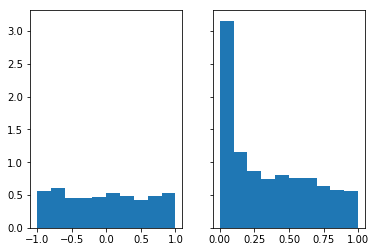

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].hist(Xs, density=True)
ax[1].hist(Ys, density=True)

These densitities look as expected.  What are the mean and variance in each case?

In [15]:
print(f"X has mean {Xs.mean():.2f} and variance {Xs.var():.2f}")

X has mean -0.02 and variance 0.35


These are close to the analytical values of 0 and 1/3.

In [19]:
print(f"Y has mean {Ys.mean():.2f} and variance {Ys.var():.2f}")

Y has mean 0.35 and variance 0.09


The expectation of $Y$ is equal to the variance of $X$.  This makes sense as:

$E[Y] = E[X^2] = V[X] + (E[X])^2 = V[X] + 0$

In [20]:
np.cov(Xs, Ys)

array([[ 0.34998283, -0.00509284],
       [-0.00509284,  0.0931631 ]])

The diagonal elements of the above matrix are the variances of $X$ and $Y$, and the off-diagonal elements are $\sigma_1\sigma_2 = \sigma_2\sigma_1.$

We see that, as expected, these latter are $0$, so that the numerator of the ratio that defines the correlation is $0$, so we have $\rho=0.$

But what about the shifted case, where the expectation of the uniform distribution will _not_ be zero?

### Shifted Distribution

In [24]:
Xs = np.random.uniform(9, 11, size=2000) # add 10 to the original distribution

In [25]:
Ys = np.square(Xs)

(array([0.02801929, 0.0287698 , 0.02576774, 0.02551756, 0.0233911 ,
        0.02489213, 0.02839454, 0.02264058, 0.02189007, 0.02088938]),
 array([ 81.00015507,  84.99740186,  88.99464865,  92.99189544,
         96.98914223, 100.98638902, 104.98363581, 108.9808826 ,
        112.97812939, 116.97537618, 120.97262297]),
 <a list of 10 Patch objects>)

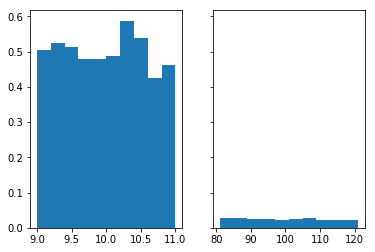

In [26]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].hist(Xs, density=True)
ax[1].hist(Ys, density=True)

Now both distributions look uniform in character.  What are the mean and variance in each case?

In [27]:
print(f"X has mean {Xs.mean():.2f} and variance {Xs.var():.2f}")

X has mean 9.99 and variance 0.33


These are close to the analytical values of $(9+11)/2 = 10$ and 1/3.

In [28]:
print(f"Y has mean {Ys.mean():.2f} and variance {Ys.var():.2f}")

Y has mean 100.06 and variance 131.03


$Y$ now acts like a uniform distribution with parameters $9^2=81$ and $11^2=121,$ which would have expectation $(81+121)/2 = 101$ and variance $(121-81)^2/12$.

In [31]:
np.cov(Xs, Ys)

array([[  0.32833397,   6.55852752],
       [  6.55852752, 131.09479795]])

The off-diagonal elements of the covariance matrix are no longer 0, so the variables _are_ correlated in this case, with a correlation given by:

In [34]:
np.cov(Xs, Ys)[0, 1] / np.sqrt(Xs.var() * Ys.var())

1.0001678888983798

I.e., they are linearly related to one another; it is only if the uniform distribution is symmetric around 0 that we see the zero correlation.

**Exercise 3.2** [Correlation coefficient is between -1 and +1]

Prove that −1 ≤ ρ(X, Y ) ≤ 1

We have that 

$\rho(X, Y) = \frac{\text{Cov}[X, Y]}{\sqrt{V[X]V[Y]}},$

and we know that the denominator has a lower bound of $0.$

We also know that if the two variables are perfectly uncorrelated (i.e., independent), then

$\text{Cov}[X, Y] = E[XY] - E[X]E[Y] = E[X]E[Y] - E[X]E[Y] = 0,$

so $0$ provides a lower bound for $|\text{Cov}[X, Y]|.$

Considering the upper bound, the Cauchy-Schwarz inequality gives us that:

$|\langle \mathbf{u}, \mathbf{v} \rangle| \leq \|\mathbf{u}\|\|\mathbf{v}\|,$

and

$|\langle \mathbf{u}, \mathbf{v} \rangle|^2 \leq \langle \mathbf{u}, \mathbf{u} \rangle \cdot \langle \mathbf{v}, \mathbf{v} \rangle,$

where $\langle \cdot , \cdot \rangle$ denotes the inner product, and $\|\cdot\|$ the L2 norm.

In our case, this can be expressed as

$|\langle \mathbf{X} - E[\mathbf{X}], \mathbf{Y} - E[\mathbf{Y}] \rangle| \leq \|\mathbf{X}-E[\mathbf{X}]\|\|\mathbf{Y}-E[\mathbf{Y}]\|,$

or

$|\text{Cov}[X, Y]| \leq \sqrt{V[X]}\sqrt{V[Y]},$

where $\text{Cov}[X, Y]$ is understood to be $E[\langle X-E[X] , Y - E[Y] \rangle],$ or the expectation of the inner product of each of $X$ and $Y$ less their respective means.

This means that we also have:

$|\text{Cov}[X, Y]|^2 \leq V[X]V[Y],$ so that

$|\rho(X, Y)| = \left|\frac{\text{Cov}[X, Y]}{\sqrt{V[X]V[Y]}}\right| \leq 
    \frac{\sqrt{V[X]V[Y]}}{\sqrt{V[X]V[Y]}} = 1,$
    
so we know that 

$|\rho(X, Y)| \leq 1$ and therefore that

$-1 \leq \rho(X, Y) \leq 1.$

**Exercise 3.3** [Correlation coefficient for linearly related variables is ±1 *]

Show that, if $Y = aX +b$ for some parameters $a > 0$ and $b$, then $ρ(X,Y) = 1$. Similarly show that if $a < 0$, then $ρ(X, Y) = −1.$

We have that

$\rho(X, Y) = \frac{\text{Cov}[X, Y]}{\sqrt{V[X]V[Y]}},$

and we know that, if $Y = aX +b,$ then $V[Y] = a^2V[X],$ so that

$\rho(X, aX+b) = \frac{\text{Cov}[X, aX+b]}{\sqrt{a^2V[X]^2}}.$

The covariance $\text{Cov}[X, aX+b]$ is given by:

$E[(X - E[X])(aX+b - E[aX + b])] = E[(X - E[X])(aX+b - E[aX] - b)] = E[(X - E[X])(aX - aE[X])]$

$ = aE[X^2 - 2XE[X] + (E[X])^2] = a(E[X^2] - (E[X])^2) = aV[X].$

Hence the correlation is given by

$\rho(X, aX+b) = \frac{a}{\sqrt{a^2}} \frac{V[X]}{\sqrt{V[X]^2}} = \frac{a}{\sqrt{a^2}}$ since the variance $V[X]$ is necessarily non-negative.

This last quantity is equal to $+1$ for $a > 0$ and $-1$ for $a <0.$

**Exercise 3.4** [Linear combinations of random variables]

Let $x$ be a random vector with mean $m$ and covariance matrix $\Sigma$. Let $A$ and $B$ be matrices.

a. Derive the covariance matrix of $Ax$. 

b. Show that $\text{tr}(AB)$ = $\text{tr}(BA)$.

c. Derive an expression for $E[x^TAx]$.

(a)

The covariance matrix for $x$ is:

$\Sigma = 
\begin{pmatrix}
E[(x_1 - \mu_1)(x_1 - \mu_1)]     & E[(x_1 - \mu_1)(x_2 - \mu_2)]  & \cdots & E[(x_1 - \mu_1)(x_N - \mu_N)]\\
E[(x_2 - \mu_2)(x_1 - \mu_1)]     & E[(x_2 - \mu_2)(x_2 - \mu_2)]  & \cdots & E[(x_2 - \mu_2)(x_N - \mu_N)]\\
\cdot &    &        & \cdot \\
\cdot &    &        & \cdot \\
\cdot &    &        & \cdot \\
E[(x_N - \mu_N)(x_1 - \mu_1)]     & E[(x_N - \mu_N)(x_2 - \mu_2)]  & \cdots & E[(x_N - \mu_N)(x_N - \mu_N)]\\
\end{pmatrix},$

where $x_i$ and $\mu_i$ are the elements of $x$ and $\mu$ respectively.  If $x$ has $N$ elements and matrix $A$ is $(M \times N),$ then $Ax$ will have $M$ elements.

The random vector $Ax$ and its mean vector will have elements

$Ax = \begin{pmatrix}
\sum_{i=1}^N A_{1i}x_i \\
\sum_{i=1}^N A_{2i}x_i \\
\sum_{i=1}^N A_{3i}x_i \\
\cdot \\
\cdot \\
\cdot \\
\sum_{i=1}^N A_{Mi}x_i \\
\end{pmatrix}
$, $\mu_{Ax} = \begin{pmatrix}
\sum_{i=1}^N A_{1i}\mu_i \\
\sum_{i=1}^N A_{2i}\mu_i \\
\sum_{i=1}^N A_{3i}\mu_i \\
\cdot \\
\cdot \\
\cdot \\
\sum_{i=1}^N A_{Mi}\mu_i \\
\end{pmatrix},$

respectively, leading to a covariance matrix:

$\Sigma_{Ax} = E
\begin{pmatrix}
\sum_{i=1}^N A_{1i}(x_i - \mu_i)\sum_{j=1}^N A_{1j}(x_j - \mu_j) & \sum_{i=1}^N A_{1i}(x_i - \mu_i)\sum_{j=1}^N A_{2j}(x_j - \mu_j) & \cdots & \sum_{i=1}^N A_{1i}(x_i - \mu_i)\sum_{j=1}^N A_{Mj}(x_j - \mu_j)\\
\sum_{i=1}^N A_{2i}(x_i - \mu_i)\sum_{j=1}^N A_{1j}(x_j - \mu_j) & \sum_{i=1}^N A_{2i}(x_i - \mu_i)\sum_{j=1}^N A_{2j}(x_j - \mu_j) & \cdots & \sum_{i=1}^N A_{2i}(x_i - \mu_i)\sum_{j=1}^N A_{Mj}(x_j - \mu_j)\\
\cdot &    &        & \cdot \\
\cdot &    &        & \cdot \\
\cdot &    &        & \cdot \\
\sum_{i=1}^N A_{Mi}(x_i - \mu_i)\sum_{j=1}^N A_{1j}(x_j - \mu_j) & \sum_{i=1}^N A_{Mi}(x_i - \mu_i)\sum_{j=1}^N A_{2j}(x_j - \mu_j) & \cdots & \sum_{i=1}^N A_{Mi}(x_i - \mu_i)\sum_{j=1}^N A_{Mj}(x_j - \mu_j)\\
\end{pmatrix}$

$= 
\begin{pmatrix}
\sum_{i,j}^N A_{1i}A_{1j}\Sigma_{ij} & \sum_{i,j}^N A_{1i}A_{2j}\Sigma_{ij} & \cdots & \sum_{i,j}^N A_{1i}A_{Mj}\Sigma_{ij} \\
\sum_{i,j}^N A_{2i}A_{1j}\Sigma_{ij} & \sum_{i,j}^N A_{2i}A_{2j}\Sigma_{ij} & \cdots & \sum_{i,j}^N A_{2i}A_{Mj}\Sigma_{ij} \\
\cdot &    &        & \cdot \\
\cdot &    &        & \cdot \\
\cdot &    &        & \cdot \\
\sum_{i,j}^N A_{Mi}A_{1j}\Sigma_{ij} & \sum_{i,j}^N A_{Mi}A_{2j}\Sigma_{ij} & \cdots & \sum_{i,j}^N A_{Mi}A_{Mj}\Sigma_{ij} \\
\end{pmatrix}.$

Below we attempt to verify this by dummying up some numbers:

In [167]:
# original random vector x has size (3 x 1)
m = np.array([5., 7., 9.])
cov_half = np.array([[1, 1, 3],                   
                [1, 4, 6], 
                [3, 6, 9]])
cov = cov_half.T @ cov_half
x_dist = multivariate_normal(mean=m, cov=cov)

In [184]:
# covariance matrix for x
cov

array([[ 11,  23,  36],
       [ 23,  53,  81],
       [ 36,  81, 126]])

In [185]:
# matrix A has size (4 x 3)
A = np.array([[1, 7, 3],
              [4, 11, 4], 
              [5, 6, 7],
              [2, 8, 5]])
Ax_mean = A @ m

In [186]:
Ax_mean

array([ 81., 133., 130., 111.])

In [187]:
def get_cov_pq(A, cov, p, q):
    """
    get the p,q-th element of the covariance matrix for Ax,
    where cov is the covariance matrix for rabdom vector x
    """
    out = 0
    N = A.shape[1]
    for ii in range(N):
        for ij in range(N):
            out += A[p, ii] * A[q, ij] * cov[ii, ij]
    return out

In [188]:
M = A.shape[0]
cov_Ax = np.zeros((M, M))
for pp in range(M):
    for pq in range(M):
        cov_Ax[pp, pq] = get_cov_pq(A, cov, pp, pq)

In [189]:
cov_Ax

array([[ 7682., 12051., 12089., 10561.],
       [12051., 18909., 18972., 16569.],
       [12089., 18972., 19061., 16630.],
       [10561., 16569., 16630., 14522.]])

In [209]:
# n.b., the covariance matrix is rejected as a singular matrix.
#Ax_dist = multivariate_normal(mean=Ax_mean, cov=cov_Ax)

In [242]:
# what if we try with a square matrix?
B = np.array([[5, 6, 7], [1.1, 1.2, 1.3], [5.5, 5.6, 5.7]])
cov_Bx = np.zeros((3, 3))
for pp in range(3):
    for pq in range(3):
        cov_Bx[pp, pq] = get_cov_pq(B, cov, pp, pq)

In [243]:
# in this case we do not get a singular matrix?  Possibly it is necessary to use a square matrix (which 
# consequently must be of the same size as the original random vector) to avoid singular matrices
np.linalg.inv(cov_Bx)

array([[ 7.10e+10, -8.06e+11,  9.68e+10],
       [-8.06e+11,  9.16e+12, -1.10e+12],
       [ 9.68e+10, -1.10e+12,  1.32e+11]])

In [215]:
# we can still find the "pseudo-inverse"
np.linalg.pinv(cov_Ax)

array([[ 0.09, -0.14, -0.03,  0.13],
       [-0.14,  0.28,  0.  , -0.22],
       [-0.03,  0.  ,  0.04, -0.02],
       [ 0.13, -0.22, -0.02,  0.19]])

In [216]:
# we can also create a distribution with the pseudo-inverse
Ax_dist = multivariate_normal(mean=Ax_mean, cov=cov_Ax, allow_singular=True)

The matrix produced in this way is supposedly singular.  Let's get an estimate of the covariance matrix produced using random variables drawn from vector Ax:

In [190]:
rvs = x_dist.rvs(2000)

In [192]:
rvs.shape

(2000, 3)

In [193]:
A.shape

(4, 3)

In [195]:
# generate transformed rvs by multiplying by A
Ax_rvs = (rvs @ A.T)

In [196]:
Ax_rvs.mean(axis=0)

array([ 82.40621043, 135.17988356, 132.14390781, 112.91609514])

In [208]:
np.set_printoptions(precision=2)
print("Numpy estimate:")
print(np.cov(Ax_rvs.T))
print("Computed analytically:")
print(cov_Ax)

Numpy estimate:
[[ 7647.82 11998.25 12025.1  10510.57]
 [11998.25 18827.57 18873.3  16491.15]
 [12025.1  18873.3  18945.76 16537.1 ]
 [10510.57 16491.15 16537.1  14448.05]]
Computed analytically:
[[ 7682. 12051. 12089. 10561.]
 [12051. 18909. 18972. 16569.]
 [12089. 18972. 19061. 16630.]
 [10561. 16569. 16630. 14522.]]


The above are close enough that it appears that the elements of the covariance matrix are being calculated correctly, even though numpy complains that the resulting matrix is singular.

In [217]:
Ax_rvs_pinv = Ax_dist.rvs(2000)

In [219]:
np.cov(Ax_rvs_pinv.T)

array([[ 7473.28, 11719.63, 11747.19, 10270.53],
       [11719.63, 18383.06, 18429.64, 16107.9 ],
       [11747.19, 18429.64, 18502.18, 16154.55],
       [10270.53, 16107.9 , 16154.55, 14117.81]])

We see that the random variables produced by the elements of $Ax$ are similar, whether we use the computed covariance matrix (allowing for the fact that we need the pseudo-inverse) or we multiply random variables produced by $x$ by matrix $A$:

(array([2.41e-05, 6.03e-05, 1.57e-04, 2.77e-04, 7.36e-04, 1.22e-03,
        1.68e-03, 2.81e-03, 3.34e-03, 3.17e-03, 3.09e-03, 2.54e-03,
        2.06e-03, 1.36e-03, 9.41e-04, 4.22e-04, 1.33e-04, 4.82e-05,
        2.41e-05, 2.41e-05]),
 array([-284.82, -243.36, -201.9 , -160.45, -118.99,  -77.54,  -36.08,
           5.38,   46.83,   88.29,  129.75,  171.2 ,  212.66,  254.11,
         295.57,  337.03,  378.48,  419.94,  461.4 ,  502.85,  544.31]),
 <a list of 20 Patch objects>)

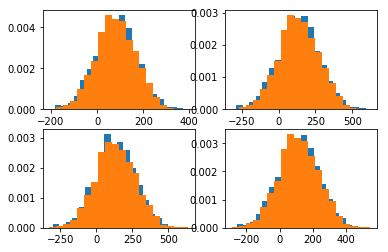

In [228]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(Ax_rvs[:, 0], density=True, bins=20)
ax[0, 0].hist(Ax_rvs_pinv[:, 0], density=True, bins=20)

ax[0, 1].hist(Ax_rvs[:, 1], density=True, bins=20)
ax[0, 1].hist(Ax_rvs_pinv[:, 1], density=True, bins=20)

ax[1, 0].hist(Ax_rvs[:, 2], density=True, bins=20)
ax[1, 0].hist(Ax_rvs_pinv[:, 2], density=True, bins=20)

ax[1, 1].hist(Ax_rvs[:, 3], density=True, bins=20)
ax[1, 1].hist(Ax_rvs_pinv[:, 3], density=True, bins=20)

(b)

$A$ and $B$ must be square matrices for their traces to be defined, hence $A$ and $B$ must be of the same size, say $M$.

The diagonal elements of $AB$ will be equal to the diagonal elements of $BA$:

$(AB)_{ii} = (BA)_{ii}$

where $1 \leq i \leq M$.  Since $\text{tr}(A)$ is simply the sum of the diagonal elements, we must have $\text{tr}(AB) = \text{tr}(BA).$

(c)

For $x^TAx$ to be defined, $A$ must be a square matrix with the same size as $x$ ($M = N$).  In that case,

$x^tAx = \begin{pmatrix}
x_1 & x_2 & x_3 & \cdots & x_N
\end{pmatrix}
\cdot
\begin{pmatrix}
\sum_{i=1}^N A_{1i}x_i \\
\sum_{i=1}^N A_{2i}x_i \\
\sum_{i=1}^N A_{3i}x_i \\
\cdot \\
\cdot \\
\cdot \\
\sum_{i=1}^N A_{Ni}x_i \\
\end{pmatrix}$

$=\sum_{i,j}^N A_{ji} x_jx_i.$  The expectation $E[x^TAx]$ must then be

$E[x^TAx] = E[\sum_{i,j}^N A_{ji} x_jx_i] = \sum_{i,j}^N A_{ji}E[x_jx_i].$

**Exercise 3.7** [Sensor fusion with known variances in 1d]

Suppose we have two sensors with known (and different) variances $v_1$ and $v_2$, but unknown (and the same)
mean $\mu$. Suppose we observe $n_1$ observations $y_i^{(1)} \sim N(\mu,v_1)$ from the first sensor and $n_2$ observations $y_i^{(2)} \sim N(\mu,v_2)$ from the second sensor. (For example, suppose $\mu$ is the true temperature outside, and sensor $1$ is a precise (low variance) digital thermosensing device, and sensor $2$ is an imprecise (high variance) mercury thermometer.) Let $D$ represent all the data from both sensors. What is the posterior $p(\mu|D)$, assuming a non-informative prior for $\mu$ (which we can simulate using a Gaussian with a precision of $0$)? Give an explicit expression for the posterior mean and variance.

We can set this up as a linear Gaussian system:

$p(\mu) = \mathcal{N}(\mu|\mu_0, \Sigma_\mu)$ (for the non-informative prior we can set $\frac{1}{\Sigma_\mu}=0$),

$p(y^{(1)}|\mu) = \mathcal{N}(y^{(1)}|W_1\mu, \Sigma_1),$

$p(y^{(2)}|\mu) = \mathcal{N}(y^{(2)}|W_2\mu, \Sigma_2),$

where $W_1$ is a $n_1 \times 1$ column (n.b., KPM has this as row) vector of $1$s and $W_2$ is a $n_2 \times 1$ column (KPM has row) vector of $1$s; $\Sigma_1$ and $\Sigma_2$ are diagonal square matrices of side $n_1$ and $n_2$ respectively, whose diagonal elements are the known quantities $v_1$ and $v_2$, respectively.

$y^{(1)}$ and $y^{(2)}$ can be combined into a single system:

$y = \begin{pmatrix}
y_1 \\
y_2 \\
\end{pmatrix},$

where the mean vector $\mu$, ($(n_1 + n_2) \times 1)$ weight (column, n.b., KPM has this as row) vector $W$ and $((n_1 + n_2) \times (n_1 + n_2))$ variance matrix $\Sigma_y$ can be easily constructed by concatenating the corresponding quantities from the separate systems.

We can then apply Bayes' rule for Gaussians to find the posterior precision:

$\Sigma_{\mu|y}^{-1} = \Sigma_\mu^{-1} + W^T\Sigma_y^{-1}W,$

so that 

$\Sigma_{\mu|y}^{-1} = W^T\Sigma_y^{-1}W = \frac{n_1}{v_1} + \frac{n_2}{v_2},$

since the prior precision $\Sigma_\mu^{-1} = 0$.

The posterior mean will then be given by:

$\mu_{\mu|y} = \Sigma_{\mu|y}[W^T\Sigma_{y}^{-1}(y-b) + \Sigma_\mu^{-1}\mu_0]$

$= \left[\frac{n_1}{v_1} + \frac{n_2}{v_2}\right]^{-1}\left (\sum_{i=1}^{n_1}y_i/v_1 + \sum_{i=n_1+1}^{n_1+n_2}y_i/v_2 \right)
= \left[\frac{n_1}{v_1} + \frac{n_2}{v_2}\right]^{-1} \left( \frac{n_1\bar{y}_1}{v_1} + \frac{n_2\bar{y}_2}{v_2} \right).$ 

We can simplify the system using the sample means of $y_1$ and $y_2$ so that 

$y = \begin{pmatrix}
\bar{y}_1 \\
\bar{y}_2 \\
\end{pmatrix},$

with $W$ as before, and $\Sigma_y$ now a $2 \times 1$ column vector with elements $v_1/n_1$ and $v_2/n_2.$

With the noninformative prior, the Bayes rule for Gaussians will leads to the same posterior mean and variance:

In [292]:
# set μ, v1, v2
μ = 15.
v1 = 1.0 # lower variance / higher precision
v2 = 3.0 # higher variance / lower precision

# say we have 20 observations from the high precision sensor
# and 60 observations from the low precision sensor
n1 = 20; n2 = 60
y1 = np.random.normal(μ, v1, size=n1)
y2 = np.random.normal(μ, v2, size=n2)

In [341]:
# the combined y is the concatenation of y1, y2
y = np.concatenate([y1, y2], axis=0)

# the individual weights are column vectors
W1 = np.ones(n1).reshape(n1, 1)
W2 = np.ones(n2).reshape(n2, 1)

# the individual variance matrices are diagonal
Σ_y1 = v1 * np.eye(n1)
Σ_y2 = v2 * np.eye(n2)

# the combined system consists of concatenations of these:
W = np.concatenate([W1, W2], axis=0)
print(f"W is a column vector with shape: {W.shape}")
Σ_y = np.vstack([np.hstack([Σ_y1, np.zeros((20, 60))]),
                 np.hstack([np.zeros((60, 20)), Σ_y2])])
print(f"Σ_y is a diagonal matrix with shape: {Σ_y.shape}")
print()
postvar = np.linalg.inv(W.T @ np.linalg.inv(Σ_y) @ W)
print(f"Posterior variance via matrix multiplication: {postvar.squeeze()}")
print(f"1/((n1/v1) + (n2/v2)): {1/((n1/v1) + (n2/v2))}")
print()
postmean = postvar @ W.T @ np.linalg.inv(Σ_y) @ y
print(f"Posterior mean via matrix multiplication: {postmean.squeeze():.4f}")
print(f"1/((n1/v1) + (n2/v2)) * (n1 * y1.mean()/v1 + n2 * y2.mean()/v2): \
    {1/((n1/v1) + (n2/v2)) * (n1 * y1.mean()/v1 + n2 * y2.mean()/v2):.4f}")

W is a column vector with shape: (80, 1)
Σ_y is a diagonal matrix with shape: (80, 80)

Posterior variance via matrix multiplication: 0.025
1/((n1/v1) + (n2/v2)): 0.025

Posterior mean via matrix multiplication: 14.9393
1/((n1/v1) + (n2/v2)) * (n1 * y1.mean()/v1 + n2 * y2.mean()/v2):     14.9393


**Exercise 3.8** [Show that the Student distribution can be written as a Gaussian scale mixture]

Show that a Student distribution can be written as a Gaussian scale mixture, where we use a Gamma
mixing distribution on the precision α, i.e.

$p(x|\mu, a, b) = \int_{0}^{\infty} \mathcal{N}(x|\mu, \alpha^{-1})\text{Ga}(\alpha, a, b)d\alpha$

This can be viewed as an infinite mixture of Gaussians, with different precisions.

$\mathcal{N}(x|\mu, \alpha^{-1}) = \frac{\alpha^{1/2}}{\sqrt{2\pi}}\exp\left\{-\frac{\alpha}{2} (x-\mu)^2 \right\}$

$\text{Ga}(\alpha, a, b) = \frac{b^a}{\Gamma(a)}\alpha^{a-1}\exp\{-b\alpha\}$

$\implies \int_{0}^{\infty} \mathcal{N}(x|\mu, \alpha^{-1})\text{Ga}(\alpha, a, b)d\alpha 
= \int_{0}^{\infty} \frac{\alpha^{a-1/2}}{\sqrt{2\pi}b^a\Gamma(a)}\exp\left\{-\alpha \left [\frac{(x-\mu)^2}{2} + \frac{1}{b}\right] \right\}  d\alpha$

$= \frac{1}{\sqrt{2\pi}b^a\Gamma(a)} \int_{0}^{\infty} \alpha^{\kappa_1-1} \exp\left\{ \alpha / \kappa_2 \right\}  d\alpha,$

where

$\kappa_1 = a+1/2,$ and $\kappa_2 = \left[ \frac{(x-\mu)^2}{2} + \frac{1}{b} \right]^{-1}.$

This means that

$\int_{0}^{\infty} \mathcal{N}(x|\mu, \alpha^{-1})\text{Ga}(\alpha, a, b)d\alpha
 = \frac{1}{\sqrt{2\pi}b^a\Gamma(a)} \frac{\Gamma(\kappa_1)}{\kappa_2^{\kappa_1}} \int_{0}^{\infty} \text{Ga}(\alpha|\kappa_1, \kappa_2) d\alpha,$
 
and since the integral over a Gamma distribution from $0$ to infinity is equal to one, we have:

$\int_{0}^{\infty} \mathcal{N}(x|\mu, \alpha^{-1})\text{Ga}(\alpha, a, b)d\alpha
 = \frac{1}{\sqrt(2\pi)b^a\Gamma(a)} \frac{\Gamma(a+1/2)}{\left[ \frac{(x-\mu)^2}{2} + \frac{1}{b} \right]^{a+1/2}}
= \frac{\sqrt{b}}{\sqrt(2\pi)}\frac{\Gamma(a+1/2)}{\Gamma(a)}\left[ \frac{b(x-\mu)^2}{2} + 1 \right]^{-(a+1/2)}.$

The Student-$t$ distribuution has the form:

$t_{\nu}(x|\mu, \sigma^2) = \frac{\Gamma(\frac{\nu+1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\nu\pi}\sigma}\left[ 1 + \frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2 \right]^{-\frac{\nu+1}{2}}.$

So, with 

$a = \nu / 2 \Leftrightarrow \nu = 2a,$

and

$b = \frac{2}{\nu \sigma^2} \Leftrightarrow \sigma^2 = \frac{2}{\nu b},$

we can write

$t_{2a}(x|\mu, \frac{2}{\nu b}) = \frac{\Gamma(a+1/2)}{\Gamma(a)} \frac{1}{\sqrt{\nu\pi}} \sqrt{\frac{\nu b}{2}} \left[ 1 + \frac{b \sigma^2}{2}\left( \frac{x-\mu}{\sigma}\right)^2 \right]^{-(a+1/2)}
= \frac{\Gamma(a+1/2)}{\Gamma(a)} \sqrt{\frac{b}{2\pi}} \left[ 1 + \frac{b}{2}\left( x-\mu\right)^2 \right]^{-(a+1/2)}
= \int_{0}^{\infty} \mathcal{N}(x|\mu, \alpha^{-1})\text{Ga}(\alpha, a, b)d\alpha.$

We can therefore consider the $t$-distribution to be a scale mix of Gaussians.